In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15613.000000,1.561300e+04,15613.000000,15612.000000,15612.000000,15612.000000,1.561200e+04,1.561100e+04,15611.000000,15611.000000,15611.000000
mean,3902.754628,4.061600e+17,68.659763,48974.185242,38.541164,-90.332979,9.328824e+04,1.348718e+09,38.533519,-90.331203,0.004292
std,2253.622607,1.294140e+18,118.841586,26980.057752,5.143933,14.068225,3.143461e+05,2.316076e+07,5.175693,14.088488,0.065374
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.163455,-166.550779,0.000000
25%,1951.000000,1.800365e+14,9.610000,26041.000000,34.699875,-96.809400,7.590000e+02,1.325583e+09,34.779525,-96.937485,0.000000
50%,3903.000000,3.518669e+15,47.500000,48202.000000,39.362950,-87.461600,2.501000e+03,1.325815e+09,39.359919,-87.429817,0.000000
75%,5854.000000,4.651007e+15,81.940000,72047.000000,41.940400,-80.158000,2.047800e+04,1.371908e+09,41.955727,-80.219295,0.000000
max,7814.000000,4.992346e+18,3204.980000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371993e+09,66.645176,-66.967742,1.000000


In [3]:
print(data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64


In [4]:
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)

In [5]:
data = pd.get_dummies(data, columns=['merchant', 'category', 'gender'], drop_first=True)

In [6]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [7]:
train = data_imputed[:len(train)]
test = data_imputed[len(train):]

X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [11]:
print(y_train_split.dtype)
print(np.unique(y_train_split))

float64
[0.         0.00429185 1.        ]


In [8]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder

y_train_split = y_train_split.astype(int)
y_val_split = y_val_split.astype(int)
y_test = y_test.astype(int)

In [15]:
log_reg.fit(X_train_split, y_train_split)
dec_tree.fit(X_train_split, y_train_split)
rand_forest.fit(X_train_split, y_train_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [16]:
log_reg_pred = log_reg.predict(X_val_split)
dec_tree_pred = dec_tree.predict(X_val_split)
rand_forest_pred = rand_forest.predict(X_val_split)

In [17]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_val_split, log_reg_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val_split, log_reg_pred)}")
print(f"Classification Report:\n{classification_report(y_val_split, log_reg_pred)}")

print("\nDecision Tree:")
print(f"Accuracy: {accuracy_score(y_val_split, dec_tree_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val_split, dec_tree_pred)}")
print(f"Classification Report:\n{classification_report(y_val_split, dec_tree_pred)}")

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_val_split, rand_forest_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_val_split, rand_forest_pred)}")
print(f"Classification Report:\n{classification_report(y_val_split, rand_forest_pred)}")

Logistic Regression:
Accuracy: 0.9916826615483045
Confusion Matrix:
[[1550    0]
 [  13    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1550
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1563
   macro avg       0.50      0.50      0.50      1563
weighted avg       0.98      0.99      0.99      1563


Decision Tree:
Accuracy: 0.9974408189379399
Confusion Matrix:
[[1548    2]
 [   2   11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1550
           1       0.85      0.85      0.85        13

    accuracy                           1.00      1563
   macro avg       0.92      0.92      0.92      1563
weighted avg       1.00      1.00      1.00      1563


Random Forest:
Accuracy: 0.9961612284069098
Confusion Matrix:
[[1550    0]
 [   6    7]]
Classification Report:
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
best_model = rand_forest
test_pred = best_model.predict(X_test)

print("\nTest Set Evaluation with Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, test_pred)}")


Test Set Evaluation with Random Forest:
Accuracy: 0.9964093357271095
Confusion Matrix:
[[7770    6]
 [  22    0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7776
           1       0.00      0.00      0.00        22

    accuracy                           1.00      7798
   macro avg       0.50      0.50      0.50      7798
weighted avg       0.99      1.00      1.00      7798



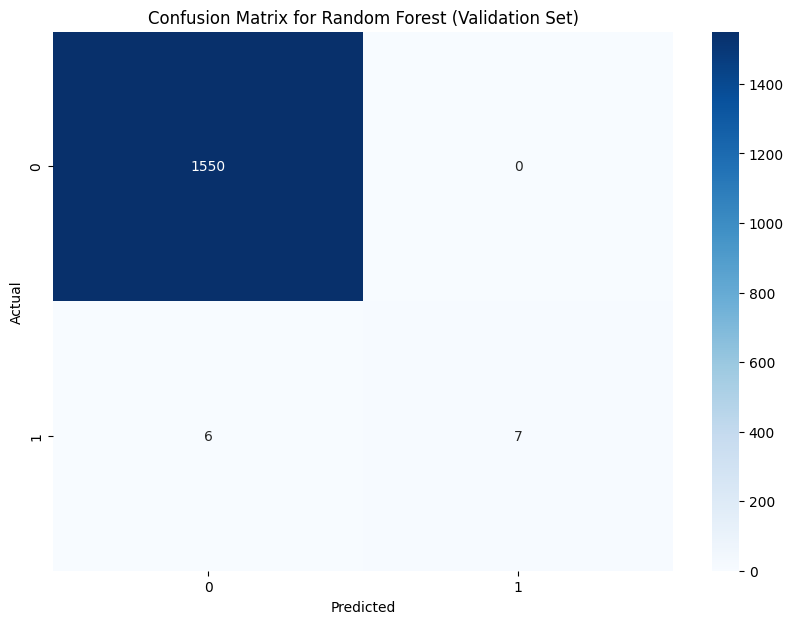

In [19]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_val_split, rand_forest_pred, 'Confusion Matrix for Random Forest (Validation Set)')

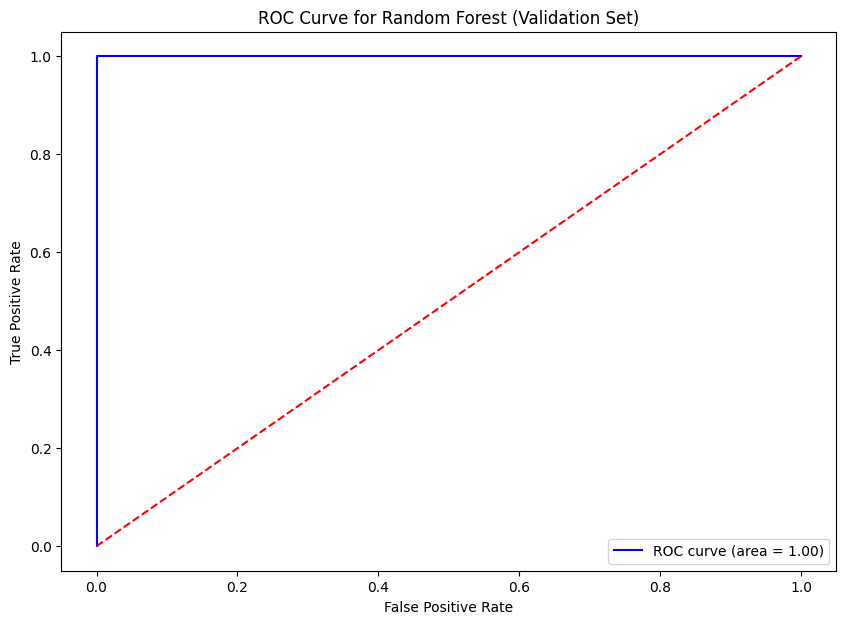

In [20]:
def plot_roc_curve(model, X, y, title):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc = roc_auc_score(y, y_prob)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(rand_forest, X_val_split, y_val_split, 'ROC Curve for Random Forest (Validation Set)')

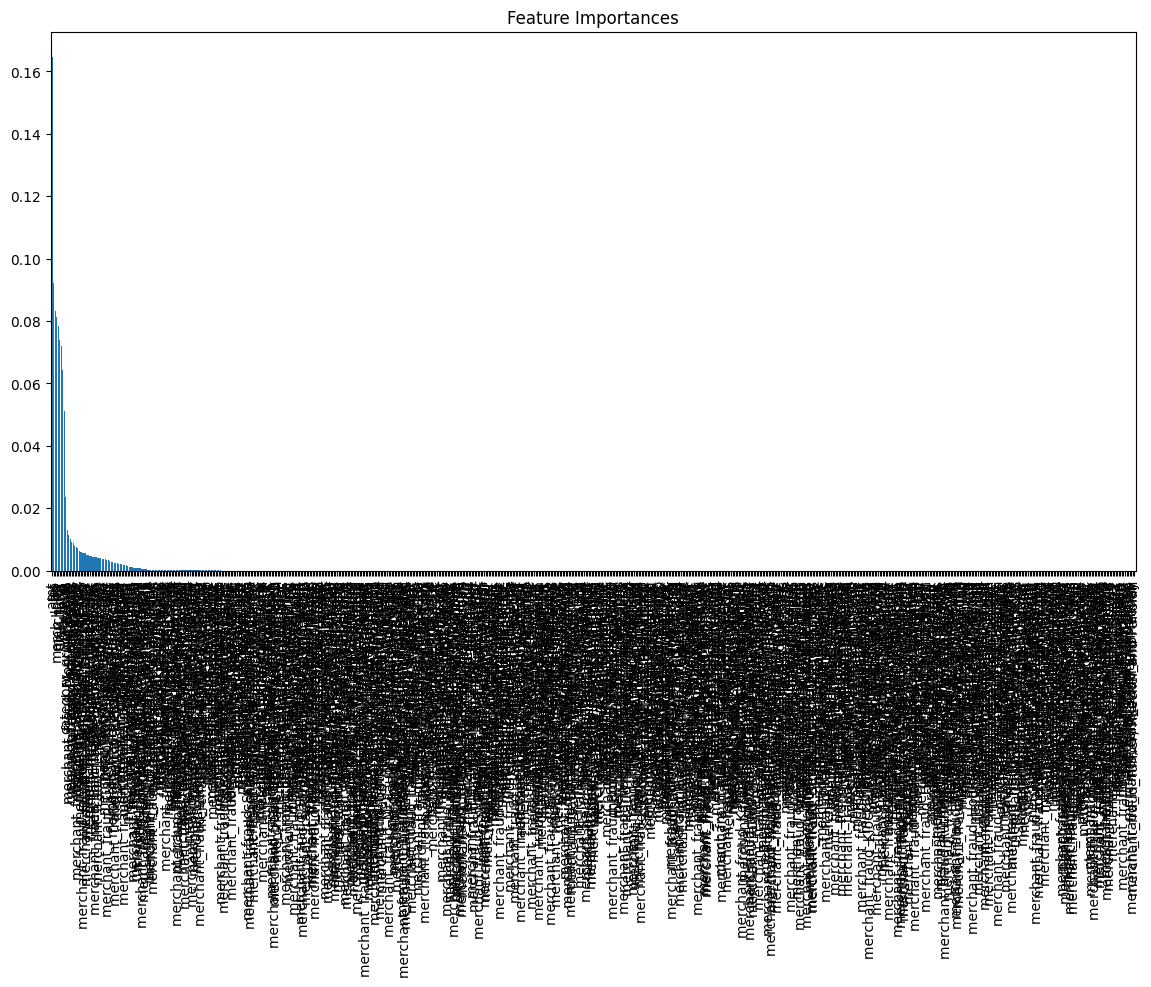

In [21]:
def plot_feature_importances(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns

    plt.figure(figsize=(14, 7))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), features[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

plot_feature_importances(rand_forest, X_train_split)

In [22]:
best_model = rand_forest

test_pred = best_model.predict(X_test)

In [24]:
print("\nTest Set Evaluation with Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, test_pred)}")


Test Set Evaluation with Random Forest:
Accuracy: 0.9964093357271095
Confusion Matrix:
[[7770    6]
 [  22    0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7776
           1       0.00      0.00      0.00        22

    accuracy                           1.00      7798
   macro avg       0.50      0.50      0.50      7798
weighted avg       0.99      1.00      1.00      7798

